In [34]:
from tools import tool
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#获取工资与学历
sql="""
	SELECT salary_low,salary_high,education FROM zhilian_job;
"""
data=pd.read_sql(sql,tool.get_connnect())
data.tail()

,salary_low,salary_high,education
422955,4000.0,5500.0,大专
422956,3000.0,4000.0,不限
422957,7000.0,8500.0,不限
422958,3000.0,6000.0,本科
422959,4001.0,6000.0,本科


In [35]:
#数据处理
grouped=data.groupby('education')
res=grouped.mean().sort_values(by='salary_high',ascending=False)
res

,salary_low,salary_high
education,,
博士,14925.186528,23473.575130
硕士,8771.152975,13483.099504
本科,7037.127138,10766.000856
不限,5764.935710,8730.155983
大专,5325.248361,8106.958136
高中,4736.912158,7086.777204
中专,4275.333424,6577.953358
中技,4164.987773,6413.207207
初中,1667.333333,3333.333333


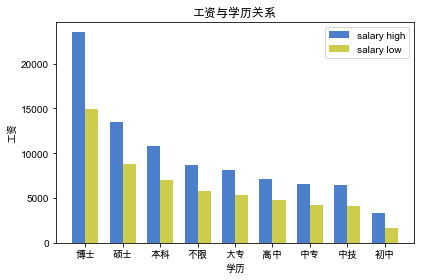

In [51]:
#可视化
#https://matplotlib.org/gallery/statistics/barchart_demo.html

fig,ax=plt.subplots()
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

bar_width=0.35
opacity=1
error_config={'ecolor':'0.3'}

index=np.arange(len(res.index))

rects1=ax.bar(index,res['salary_high'],bar_width,alpha=opacity,color=(0.3,0.5,0.8),error_kw=error_config,label='salary high')
rects2=ax.bar(index+bar_width,res['salary_low'],bar_width,alpha=opacity,color=(0.8,0.8,0.3),error_kw=error_config,label='salary low')

ax.set(xlabel='学历',ylabel='工资',title='工资与学历关系')
ax.set_xticks(index+bar_width/2)
ax.set_xticklabels(res.index)
ax.legend()

fig.tight_layout()
plt.show()

fig.savefig('{}.png'.format(ax.get_title()), transparent=False, dpi=80, bbox_inches="tight")
